Things to do: sentiment analysis of most recent 100 tweets of various news orgs

Initialize lots of empty lists

(build a function?)

* For one news org:
* Pull 100 last tweets (or pull 1 at a time, 100 times?)
** See 1-Solved-StuGetRelief for looping through 100
* Run each through Vader
* Collect: text, date, compound, pos, neg, neut; add to respective lists
* Average compounds for each news org; add to compound average list
* Clear lists


DF of lists

PLOT 1
* Actually 5 plots
* ?? How to number Tweets Ago? Need a column for this? Or use Pandas index?)*
* Plot compounds


PLOT 2
* Zip News org keys with compound average list into dict
* Create DF

* Build data frame of lists


Export to CSV, Save plots as PNG


In [35]:
# Import Dependencies

import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [45]:
# Target User Account
target_user = "@CNN"

# Counter
counter = 1

# # Loop through 5 pages of tweets (total 100 tweets)
# for x in range(5):

#     # Get all tweets from home feed
public_tweets = api.user_timeline(target_user, count=100)

# Loop through all tweets
for tweet in public_tweets:

    # Print Tweets
    print(f'Tweet {counter}: {tweet["text"]}')

    # Add to Counter
    counter = counter + 1

Tweet 1: Bottles from Trump Winery have been on sale at a gift shop in Shenandoah National Park, drawing criticism from ethi… https://t.co/oZ0il456dq
Tweet 2: This slow-motion drone footage shows the Georgia Dome in Atlanta being imploded https://t.co/AO2hbqCMOk https://t.co/0nlMTWzUaD
Tweet 3: A former ethics director says he filed an official complaint against Kellyanne Conway, arguing she violated the Hat… https://t.co/E52AGH7TZq
Tweet 4: Florida boy wanted by police in connection with suspected death of his grandmother is caught near Canadian border,… https://t.co/WPGWpJdvPJ
Tweet 5: 70% of Americans — with majorities in both parties — think that Puerto Rico is not getting the help it needs in the… https://t.co/zSkODmjpiQ
Tweet 6: A federal judge has permanently blocked President Trump’s executive order to cut funding from so-called “sanctuary… https://t.co/2PGGGrTikb
Tweet 7: Meet 'Oumuamua, a cigar-shaped asteroid that is the first observed interstellar visitor to our solar syste

In [47]:
# Target User Accounts
target_users = ("@BBC", "@CBS", "@CNN", "@FoxNews", "@NYT")

# Variable for holding sentiments
sentiments = []

#Variables for holding average Vader compound scores

# Loop through all target users
for target in target_users:

    # Variable for holding the oldest tweet
    #oldest_tweet = None
    counter = 0
    
    # Variables for holding sentiments
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []

#     # Loop through 5 pages of tweets (total 100 tweets)
#     for x in range(5):

    # Get all tweets from home feed
    public_tweets = api.user_timeline(target, count=100)

    # Loop through all tweets 
    for tweet in public_tweets:

        # Print Tweets
        #print("Tweet %s: %s" % (counter, tweet["text"]))

        # Run Vader Analysis on each tweet
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        tweets_ago = counter

        # Add sentiments for each tweet into an array
        sentiments.append({"Tweet": tweet["text"],
                           "News Org": target,
                           "Tweets Ago": counter,
                        "Date": tweet["created_at"], 
                       "Compound": compound,
                       "Positive": pos,
                       "Negative": neu,
                       "Neutral": neg})

        # Add to counter 
        counter = counter + 1

    x+=1

In [48]:
# Convert sentiments to DataFrame
sentiments_pd = pd.DataFrame.from_dict(sentiments)

# Configure dataframe column order and display
sentiments_pd = sentiments_pd[['News Org',
                        'Tweets Ago',
                         'Date',
                         'Tweet',
                         'Compound',
                         'Positive',
                         'Neutral',
                         'Negative']]

sentiments_pd

,News Org,Tweets Ago,Date,Tweet,Compound,Positive,Neutral,Negative
0,@BBC,0,Sat Nov 25 20:35:04 +0000 2017,The frozen bodies of 15 men are discovered on ...,-0.7845,0.000,0.266,0.734
1,@BBC,1,Sat Nov 25 19:53:03 +0000 2017,"50 years since his murder, celebrate the wit, ...",-0.2500,0.140,0.178,0.682
2,@BBC,2,Sat Nov 25 19:33:02 +0000 2017,Re-rewind! 🎤 🙌 Who else wants to watch @CraigD...,0.0000,0.000,0.000,1.000
3,@BBC,3,Sat Nov 25 18:30:06 +0000 2017,The London mum using her maternity leave to tr...,0.2960,0.106,0.053,0.841
4,@BBC,4,Sat Nov 25 18:14:06 +0000 2017,Claw blimey! 🦀 Here's why thousands of spider ...,0.0000,0.000,0.000,1.000
5,@BBC,5,Sat Nov 25 17:30:42 +0000 2017,RT @BBCMOTD: Chaos at Norwich...\n\nA 'local b...,-0.1027,0.150,0.168,0.682
6,@BBC,6,Sat Nov 25 17:30:08 +0000 2017,The @WorldPressPhoto's Noortje Gorter discusse...,0.0000,0.000,0.000,1.000
7,@BBC,7,Sat Nov 25 17:25:18 +0000 2017,RT @bbcstrictly: It's #Strictly Saturday! We a...,0.0000,0.000,0.000,1.000
8,@BBC,8,Sat Nov 25 17:24:41 +0000 2017,RT @BBCR1: Here's 14 of the best Live Lounge p...,0.7964,0.283,0.000,0.717
9,@BBC,9,Sat Nov 25 17:24:30 +0000 2017,RT @BBCiPlayer: **** GEO block to local people...,-0.4404,0.000,0.225,0.775


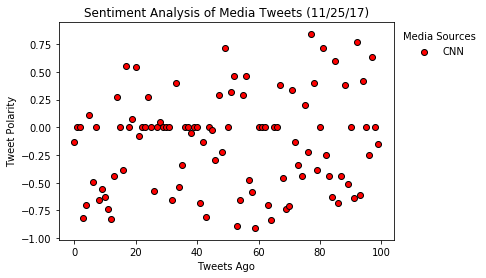

In [72]:
# Create overlaid scatterplots news organizations' compound scores
# bbc = , cbs = teal, cnn = tomato or orangered, fox = blue, nyt = gold

cnn = plt.scatter(sentiments_pd.groupby(["News Org"]).get_group("@CNN")["Tweets Ago"],
                sentiments_pd.groupby(["News Org"]).get_group("@CNN")["Compound"],
                  facecolors='red', edgecolors='black', label="CNN")

# cnn = plt.scatter(merged_df.groupby(['type']).get_group('Urban')["Ride Count"], 
#             merged_df.groupby(['type']).get_group('Urban')["Average Fare"], 
#             facecolors='coral', edgecolors="black", s= merged_df["driver_count"], alpha=0.75, label="Urban")

# Set textual properties
now = datetime.now()
now = now.strftime("%m/%d/%y")
plt.title(f'Sentiment Analysis of Media Tweets ({now})')
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")

# Configure legend with Media Sources
plt.legend(handles=[cnn], title="Media Sources", bbox_to_anchor=(1, 1), frameon=False)


# plt.legend(loc="upper right")
#plt.legend(handles=[cnn], loc="center left", title="Media Sources", bbox_to_anchor=(1, 0.5))

#df.plot().legend(loc='center left', bbox_to_anchor=(1, 0.5))
# figtext(.95, .6, "Note:\nCircle size correlates with driver count per city.", rotation='horizontal')

plt.show()

In [50]:
average_compound = sentiments_pd.groupby("News Org").mean()["Compound"]

compounds_df = pd.DataFrame({"Average Compound Score": average_compound})
compounds_df

,Average Compound Score
News Org,
@BBC,0.088030
@CBS,0.269081
@CNN,-0.133306
@FoxNews,-0.040515
@NYT,-0.085639
